# 🚢 ท่องเที่ยวยิ่งบูม เงินเฟ้อยิ่งโต จริงหรือ?

### คำนำ 

อุตสาหกรรมการท่องเที่ยว เป็นอุตสาหกรรมที่สร้างรายได้ให้เป็นอันดับต้น ๆ ของประเทศไทยซึ่งส่งผลโดยตรงกับการพัฒนาเศรษฐกิจของประเทศ และความเป็นอยู่ของประชากรในหลาย ๆ ชุมชน ซึ่งในหลายปีที่ผ่านมานี้ การท่องเที่ยวได้เติบโตและส่งผลให้เศรษฐกิจของประเทศไทยเติบโตเป็นอย่างมาก โดยจะสามารถสังเกตได้จากตามหน้าหนังสือพิมพ์และข่าวบน Social Media ว่าประเทศไทยของเรามีนักท่องเที่ยวเข้ามาเป็นจำนวนมาก โดยประเทศของเราติด 1 ใน 10 อันดับประเทศที่มีนักท่องเที่ยวต่างชาติเข้ามาเยอะที่สุดในโลก (World Tourism rankings by UN World Tourism Organisation)

ทั้งนี้ในช่วงหลังมานี้มีความกังวลในเรื่องของอัตราค่าครองชีพที่สูงขึ้น และราคาของสินค้าที่สูงขึ้นซึ่งพบในหลายพื้นที่โดยสังเกตจากการที่ราคาของสินค้าที่อยู่ในร้านสะดวกซื้อ (7-11) เพิ่มสูงขึ้น และถูก distributed ไปในทุกจังหวัดของประเทศ ผู้จัดทำจึงอยากทราบว่าการที่นักท่องเที่ยวชาวต่างชาติเดินทางเข้ามาในประเทศไทย ส่งผลกับการที่อัตราเงินเฟ้อของประเทศเพิ่มขึ้นหรือไม่ 

โดยเราได้ตั้งสมมติฐานไว้ว่า ```การที่นักท่องเที่ยวชาวต่างชาติเดินทางเข้ามาในประเทศไทยทำให้อัตราเงินเฟ้อของเราเพิ่มมากขึ้น```

หมายเหตุ : การพิจารณาเงินเฟ้อมีหลากหลายองค์ประกอบ แต่ในกรณีส่วนนี้ผู้จัดทำขอพิจารณาโดยเทียบจากจำนวนนักท่องเที่ยวและรายได้รับโดยรวมเป็นสำคัญ

### จัดทำโดย 
* นายพริษฐ์        จงพิเชษฐวรกุล  6241147126
* นายสุรเมศร์       โชคชัยสุวรรณ  6341232926
* นางสาวธวัลรัตน์    ลีลาประทักษ์   6341096926

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
from PIL import Image

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.ticker as ticker

import requests
from io import BytesIO

print(pd.__version__)
pd.Timestamp.now()

1.5.2


Timestamp('2023-02-03 12:06:50.131225')

In [2]:
def get_pic_from_url(url):

    # get pic by request from website
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # return img
    return img

---

## Data Selection and Data Cleaning

ผู้จัดทำได้นำข้อมูลนักท่องเที่ยวที่เข้ามาในประเทศตั้งแต่ปี 2013-2019 มาใช้ในการวิเคราะห์ข้อมูล โดยนำข้อมูลที่ได้มาจาก [กระทรวงการท่องเที่ยวและกีฬา](https://www.mots.go.th/news/category/411)

In [3]:
def create_continent_index(temp_df):
    continents = []

    for rows in range(len(temp_df)):
        if rows <= 16:
            continents.append('East Asia')
        elif 17 <= rows <= 33:
            continents.append('Europe')
        elif 34 <= rows <= 39:
            continents.append('The Americas')
        elif 40 <= rows <= 46:
            continents.append('South Asia')
        elif 47 <= rows <= 50:
            continents.append('Oceania')
        elif 51 <= rows <= 57:
            continents.append('Middle East')
        elif 58 <= rows <= 60:
            continents.append('Africa')
    return continents

In [4]:
url_2013 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2013.xlsx'
url_2014 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2014.xlsx'
url_2015 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2015.xlsx'
url_2016 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2016.xlsx'
url_2017 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2017.xlsx'
url_2018 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2018.xlsx'
url_2019 = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Tourist_ArrivalData_2019.xlsx'

In [5]:
file_list = [url_2013, url_2014, url_2015, url_2016, url_2017, url_2018, url_2019]
df_list = []

for file in file_list:
    temp_df = pd.read_excel(file, skiprows = 5, skipfooter = 2)
    temp_df.insert(1,"Year", file[-9:-5])
    temp_df['Continents'] = create_continent_index(temp_df)
    
    if file[-9:-5] in ['2013','2014','2015']:
        temp_df.drop(temp_df.columns[7], axis = 1, inplace = True)
        df_list.append(temp_df)
    else:
        temp_df.drop(temp_df.iloc[:, 7:22], axis = 1, inplace = True)
        df_list.append(temp_df)

df = pd.concat(df_list)
df = df.drop(columns='$US/Day').reset_index(drop = True)
df = df.iloc[:, [6,0,1,2,3,4,5]]

In [6]:
df = df.rename(columns = { 
    'of Residence' : 'Country',
    'Unnamed: 1' : 'No. Arrival',
    '(Days)' : 'Avg. Length of Stay',
    'Baht/Day' : 'Spending per capita per day (Baht)',
    'Mil. Baht' : 'Tourism Receipts (Mil. Baht)'
})

In [7]:
df.drop(['Avg. Length of Stay'], axis = 1, inplace = True)

In [8]:
delete_list = ['East Asia', 'Europe', 'The Americas', 'South Asia', 'Oceania', 'Middle East', 'Africa', 'Asean']

for element in delete_list:
    df = df[df['Country'] != element]

In [9]:
df_with2013 = df.copy()
df = df[df['Year'] != '2013'].reset_index(drop = True)

In [10]:
df.groupby(['Continents','Year']).sum()

C:\Users\66809\AppData\Local\Temp/ipykernel_12348/2456738574.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Continents','Year']).sum()


No. Arrival  Spending per capita per day (Baht)  \
Continents   Year                                                    
Africa       2014       162772                            10737.09   
             2015       164674                            10753.96   
             2016       172734                            11209.88   
             2017       192294                            11832.41   
             2018       200328                            11424.50   
             2019       196819                            11027.19   
East Asia    2014     14767849                            75689.15   
             2015     20093929                            79425.66   
             2016     21861353                            83717.90   
             2017     24166276                            87231.45   
             2018     26225446                            86927.04   
             2019     27669963                            84786.01   
Europe       2014      6028171                            68104.05   
             2015      5476781                            70268.39   
             2016      6008398                            70585.69   
             2017      6322166                            70985.52   
             2018      6603695                            70019.61   
             2019      6531220                            68059.11   
Middle East  2014       644265                            34443.46   
             2015       720791                            36373.53   
             2016       821458                            38908.06   
             2017       875043                            41065.73   
             2018       767796                            40370.08   
             2019       727318                            38908.19   
Oceania      2014       943930                            14634.16   
             2015       923886                            15474.52   
             2016       918538                            15753.30   
             2017       947777                            16373.38   
             2018       911038                            16348.56   
             2019       874154                            16177.27   
South Asia   2014      1213785                            30750.16   
             2015      1374292                            31790.79   
             2016      1405634                            33675.90   
             2017      1639528                            35497.13   
             2018      1935883                            36298.72   
             2019      2356977                            33948.83   
The Americas 2014      1048911                            23710.74   
             2015      1168832                            24252.46   
             2016      1341473                            24509.00   
             2017      1448894                            24458.86   
             2018      1534008                            24242.76   
             2019      1559800                            23508.12   

                   Tourism Receipts (Mil. Baht)  
Continents   Year                                
Africa       2014                       9900.99  
             2015                      10809.16  
             2016                      11880.27  
             2017                      14211.37  
             2018                      14466.45  
             2019                      13304.65  
East Asia    2014                     511647.46  
             2015                     784962.13  
             2016                     894557.12  
             2017                    1024238.69  
             2018                    1068971.87  
             2019                    1125223.49  
Europe       2014                     417360.48  
             2015                     395230.16  
             2016                     432959.12  
             2017                     463602.99  
             2018                     

---

## Interactive Graph

In [11]:
continent_list = []
country_list = []
year_list = []
dimension_list = []

for element in df.columns:
    if element == 'Continents':
        continent_list = list(df[element].unique())
    elif element == 'Country':
        country_list = sorted(list(df[element].unique()))
    elif element == 'Year':
        year_list = list(df[element].unique())
    else:
        dimension_list.append(element)

In [12]:
@interact(Continent = continent_list, Year = year_list, Dimension = dimension_list)
def plot_chart(Continent, Year, Dimension):
    graph = df[(df['Continents'].isin([Continent])) & df['Year'].isin([Year])]
    graph = graph.sort_values(by=Dimension, ascending=False)
    plt.figure(figsize=(24, 6))
    sns.barplot(data=graph, x='Country', y= Dimension , hue = 'Continents')
    plt.grid(alpha = 0.2)
    
    # Get the current axis
    ax = plt.gca()

    if Dimension == 'No. Arrival':
        plt.title(f'Numbers of international tourists from {Continent} by Country in {Year}')
    elif Dimension == 'Tourism Receipts (Mil. Baht)':
        plt.title(f"Total Tourism Receipts from {Continent}'s tourists by Country in {Year}")
    else:
        plt.title(f"Average {Continent}'s tourists spending per capita per day by Country in {Year}")

    # Define a custom formatter function
    def y_axis_numformat(x, pos):
        return "{:,.0f}".format(x)
    
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_numformat))
    
    plt.show()


interactive(children=(Dropdown(description='Continent', options=('East Asia', 'Europe', 'The Americas', 'South…

In [13]:
@interact(Country = country_list,  Dimension = dimension_list)
def plot_chart(Country = 'China', Dimension = 'No. Arrival'):
    graph = df[(df['Country'].isin([Country]))]
    plt.figure(figsize=(13, 6))
    sns.barplot(data=graph, x='Year', y= Dimension, hue = 'Country')
    plt.grid(alpha = 0.2)
    
    if Dimension == 'No. Arrival':
        plt.title(f'Numbers of international tourists from {Country} entering Thailand from 2014-2019')
    elif Dimension == 'Tourism Receipts (Mil. Baht)':
        plt.title(f"Total Tourism Receipts from {Country}'s tourists from 2014-2019")
    else:
        plt.title(f"Average {Country}'s tourists spending per capita per day from 2014-2019")
    # Get the current axis
    ax = plt.gca()
    
    # Define a custom formatter function
    def y_axis_numformat(x, pos):
        return "{:,.0f}".format(x)

    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_numformat))

    plt.show()

interactive(children=(Dropdown(description='Country', index=9, options=('Argentina', 'Australia', 'Austria', '…

---

## Inflation (เงินเฟ้อ)

* เงินเฟ้อวัดจาก ดัชนีราคาผู้บริโภค หรือ CPI (Consumer Price Index)
    * เป็นตัวเลขทางสถิติที่ใช้วัดการเปลี่ยนแปลงของราคาสินค้าและบริการในปัจจุบันเปรียบเทียบกับราคาในปีที่กำหนดไว้เป็นปีฐาน (เพิ่มขึ้นลดลง ?)

<u>ปัจจัยที่ทำให้เกิดเงินเฟ้อ</u> พิจารณาแยกออกเป็น 2 ด้าน ในด้าน Demand / Supply
* คนมีความต้องการซื้อสินค้ามากขึ้น (Demand-Pull Inflation) 
    * อ้างอิงตามหลักการของเศรษฐศาสตร์ เมื่อจำนวนอุปสงค์โดยรวม (Aggregated Demand) มีมากกว่าอุปทานโดยรวม (Aggregated Supply) จะเรียกอย่างง่ายได้ว่า "มีความต้องการสินค้ามากกว่าที่ตลาดมีขาย" จึงทำให้เกิดสิ่งที่ตามมาคือ สินค้ามีราคาสูงขึ้น เพื่อให้สมดุลกับความต้องการที่เกิดขึ้น
* ต้นทุนด้านการผลิตสูงขึ้น (Cost-Push Inflation)
    * ในกรณีที่ต้นทุนของสินค้าสูงขึ้นไม่ว่าเป็นปัจจัยใดๆ ก็ตาม (น้ำมันแพงขึ้น, ค่าแรงขั้นต่ำสูงขึ้น, ภาษีสูงขึ้น) ดังนั้นเมื่อต้นทุนในการผลิตเพิ่มขึ้น ก็จะถูกผลักมาให้ผู้บริโภคเป็นผู้รับภาระแทน เหมือนในปัจจุบันที่ราคาของสินค้าขยับตัวขึ้นทุกประเภท ไม่ว่าจะเป็น อาหารจานเดียว เครื่องดื่ม รวมไปถึงสินค้าทุกประเภท

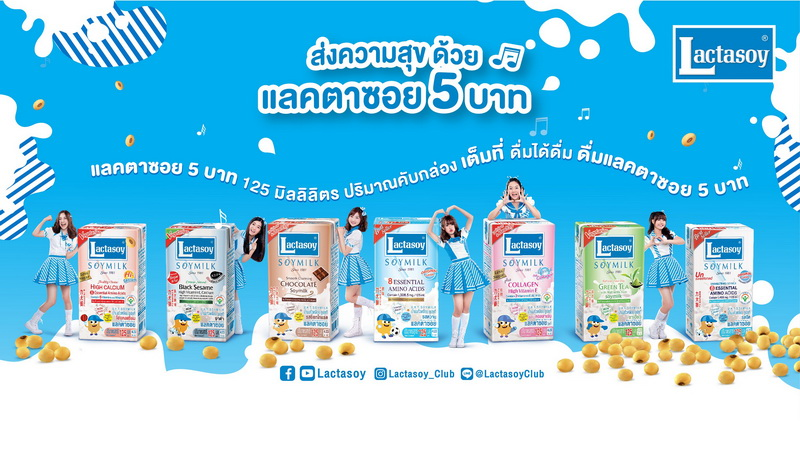

In [14]:
lacthasoy = 'https://github.com/sc-matthew/Pandas_Project/raw/main/PIC_Lacthasoy%20Commercial.jpg'

get_pic_from_url(lacthasoy)

In [15]:
vn_inflation = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Vietnam_InflationRates.csv'
th_inflation = 'https://github.com/sc-matthew/Pandas_Project/raw/main/Thailand_InflationRates.csv'

In [16]:
url_list = [th_inflation, vn_inflation]
df_list = []

for file in url_list:
    raw = pd.read_csv(file, skiprows = 1)
    raw.drop(raw.iloc[:, 2:5], axis = 1, inplace = True)
    temp1 = raw.drop(raw.index[0:2]).astype('str')
    temp1 = temp1.drop(raw.index[8:])


    if 'Vietnam' in file:
        temp1['Vietnam'] = pd.to_numeric(temp1['Vietnam'].str.strip('%'), errors='coerce')
        temp1 = temp1.rename(columns={
            'Vietnam' : 'Vietnam Inflation (% Change)'})
        df_list.append(temp1)
    else:
        temp1['Thailand'] = pd.to_numeric(temp1['Thailand'].str.strip('%'), errors='coerce') 
        temp1 = temp1.rename(columns={
            'Thailand' : 'Thailand Inflation (% Change)'})
        df_list.append(temp1)
    

df_merged = pd.merge(df_list[0], df_list[1], on = 'Year')
df_merged = df_merged.sort_values(by=['Year']).reset_index().drop(columns=['index'])

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           6 non-null      object 
 1   Thailand Inflation (% Change)  6 non-null      float64
 2   Vietnam Inflation (% Change)   6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 272.0+ bytes


In [18]:
df_merged

,Year,Thailand Inflation (% Change),Vietnam Inflation (% Change)
0,2014,1.90,4.08
1,2015,-0.90,0.63
2,2016,0.19,2.67
3,2017,0.67,3.52
4,2018,1.06,3.54
5,2019,0.71,2.80


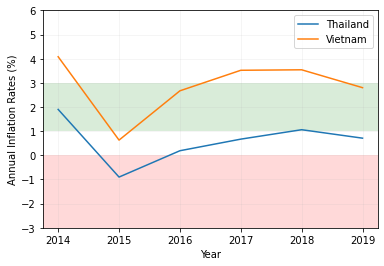

In [19]:
# Create the first line plot
sns.lineplot(x=df_merged['Year'], y=df_merged['Thailand Inflation (% Change)'], label='Thailand')

# Create the second line plot
sns.lineplot(x=df_merged['Year'], y=df_merged['Vietnam Inflation (% Change)'], label = 'Vietnam')

# Label name in Y-axis
plt.ylabel("Annual Inflation Rates (%)")

# Make y-axis start from -3 to 6
plt.ylim(-3,6)

# Create green ribbon in graph
plt.axhspan(1, 3, facecolor = 'green', alpha = 0.15)
plt.axhspan(-3, 0, facecolor = 'red', alpha = 0.15)
plt.grid(alpha = 0.15)

# Show the plot
plt.show()

## Description
จากกราฟที่แสดงในรูปแบบ Line graph แสดง % การเปลี่ยนแปลงของภาวะเงินเฟ้อภายใน <mark style="background-color: #44c5f5">ประเทศไทย (สีน้ำเงิน)</mark> <mark style="background-color: #f5af44">และเวียดนาม (สีส้ม)</mark> โดยกรอบอัตราเงินเฟ้อของ Bank of Thailand (BOT) มีการตั้งกรอบอัตราเงินเฟ้อที่เหมาะสมไว้ที่ 1-3% ต่อปี และพยายามจะไม่ให้เกินกรอบที่ตั้งไว้เพื่อควบคุมเสถียรภาพของค่าเงินบาทและเศรษฐกิจ


รายละเอียดจากกราฟ : จะเห็นได้ว่าประเทศไทยปี 2014 มีภาวะเงินเฟ้ออยู่ในเกณฑ์ปกติดีที่ประมาณ 2% ซึ่งบ่งบอกถึงการเติบโตของเศรษฐกิจ แต่ในปี 2015 ประเทศไทยเกิดสภาวะชะลอตัวของเศรษฐกิจ -0.9% (ซึ่งในขณะนั้นเป็นผลให้เกิดภาวะเงินฝืด เนื่องจากอัตราเงินเฟ้อติดลบ) และในปี 2016 - 2019 อยู่ในเกณฑ์ปกติที่ 0-1% โดยผู้จัดทำได้นำอัตราเงินเฟ้อของประเทศเพื่อนบ้านอย่างเวียดนามที่มีลักษณะพึ่งพาการส่งออกสินค้าเกษตรและการท่องเที่ยวเหมือนกัน

ซึ่งสภาวะเงินเฟ้อในไทยคล้ายกับประเทศเพื่อนบ้านอย่างเวียดนามแต่เวียดนามมีสภาวะเงินเฟ้อที่รุนแรงกว่าโดยปี 2014 อยู่ที่ 4% ซึ่งถือเป็นเงินเฟ้อรุนแรงไม่ดีต่อระบบเศรษฐกิจ อยู่ในระดับที่ผู้ประกอบการไม่สามารถปรับตัวได้ทัน ต่อมาปี 2015 อยู่ที่ 0-1 % และปี 2016-2019 อยู่ที่ 2-4% ซึ่งมีอัตราการเติบโตของเศรษฐกิจมากกว่าไทย แต่อย่างไรก็ดีประเทศไทยและเวียดนามมีลักษณะของกราฟในทิศทางเดียวกันตั้งแต่ปี 2014-2019 
 

---

## Preparing Data for analyze in Seaborn Correlation

In [20]:
summarised_df = df_with2013.groupby('Year').sum().reset_index()
summarised_df['Tourism Receipts (% Change)'] = summarised_df['Tourism Receipts (Mil. Baht)'].pct_change() * 100
summarised_df['No. Arrival (% Change)'] = summarised_df['No. Arrival'].pct_change() * 100

C:\Users\66809\AppData\Local\Temp/ipykernel_12348/527651325.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summarised_df = df_with2013.groupby('Year').sum().reset_index()


In [21]:
summarised_df = summarised_df.drop(0)
summarised_df

,Year,No. Arrival,Spending per capita per day (Baht),Tourism Receipts (Mil. Baht),Tourism Receipts (% Change),No. Arrival (% Change)
1,2014,24809683,258068.81,1172798.17,-2.845360,-6.543338
2,2015,29923185,268339.31,1457150.28,24.245613,20.610912
3,2016,32529588,278359.73,1633497.55,12.102202,8.710313
4,2017,35591978,287444.48,1831104.99,12.097198,9.414168
5,2018,38178194,285631.27,1876136.90,2.459275,7.266289
6,2019,39916251,276414.72,1911807.95,1.901303,4.552486


## Seaborn Correlation

ความหมาย : เป็นค่าที่บ่งบอกถึงความสัมพันธ์ของตัวแปร 2 โดยที่ค่าสัมประสิทธิ์สหสัมพันธ์จะมีค่าอยู่ระหว่าง -1.0 จนถึง +1.0 โดยหากพบว่าค่า r เข้าใกล้ -1.0 หมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันในเชิงตรงกันข้าม แต่หากค่า r มีค่าเข้าใกล้ +1.0 หมายความว่าตัวแปรทั้งสองมีความสัมพันธ์ไปในทิศทางเดียวกัน แต่ถ้าตัวแปรทั้งสองมีค่าสัมประสิทธิ์สหสัมพันธ์เท่ากับ 0 หมายความว่าตัวแปรทั้งสองไม่มีความสัมพันธ์กัน [อ้างอิงจาก : DIGI Thailand](https://digi.data.go.th/blog/what-is-correlation-coefficient/)

In [22]:
corr_temp1 = summarised_df.drop(['Spending per capita per day (Baht)'], axis = 1)
corr_df = pd.merge(corr_temp1, df_merged, on = 'Year').drop(['Tourism Receipts (Mil. Baht)', 'No. Arrival','Vietnam Inflation (% Change)'], axis = 1)
corr_df

,Year,Tourism Receipts (% Change),No. Arrival (% Change),Thailand Inflation (% Change)
0,2014,-2.845360,-6.543338,1.90
1,2015,24.245613,20.610912,-0.90
2,2016,12.102202,8.710313,0.19
3,2017,12.097198,9.414168,0.67
4,2018,2.459275,7.266289,1.06
5,2019,1.901303,4.552486,0.71


C:\Users\66809\AppData\Local\Temp/ipykernel_12348/1665308199.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb_corr = corr_df.corr()


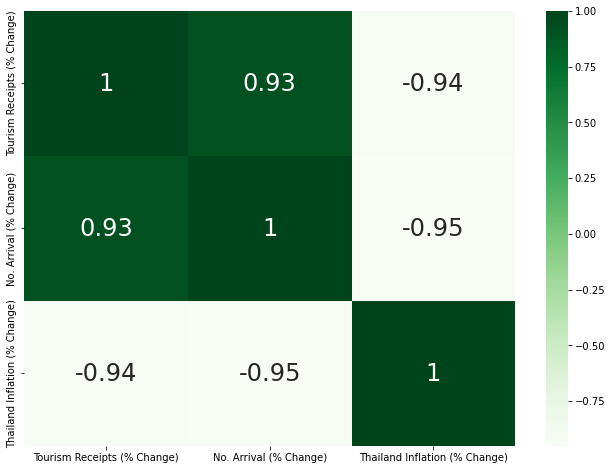

In [23]:
sb_corr = corr_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(sb_corr, cmap='Greens',annot=True, annot_kws={"size": 24})
plt.show()

## Description

ทางผู้จัดทำได้ทำ Correlation ออกมาในรูปแบบของ Heatmap โดยมีทั้งหมด 3 ตัวแปรในการหาความสัมพันธ์ในแต่ละคู่ของตัวแปร โดยผู้จัดทำได้แปลงข้อมูลให้อยู่ในฐานของ Percentage เพื่อหลีกเลี่ยงในเรื่องของ Unit ที่อาจจะไม่เท่าเทียมกันซึ่งอาจส่งผลต่อผลลัพธ์ได้

```โดยมีทั้งหมด 3 ตัวแปรที่เราสนใจและเลือกเข้ามาอยู่ในการทำ Correlation Analysis```
* Tourism Receipts (% Change)
* No. Arrival (% Change)
* Thailand Inflation (% Change)


โดยเราต้องการที่จะพิสูจน์ สมมติฐานที่ว่า "จำนวนนักท่องเที่ยวที่เข้าในมาในประเทศไทยมีผลต่อภาวะเงินเฟ้อภายในประเทศหรือไม่"  
* การที่ Aggregated Demand สูงขึ้นจะส่งผลให้ราคาสูงขึ้นตาม 
* และเมื่อใดที่ Aggregated Demand ลดลงจะส่งผลให้ราคาก็จะลดลงตาม 

ซึ่งการที่นักท่องเที่ยวเข้ามาภายในประเทศนั้นเป็นเหตุที่ส่งผลให้ Aggregated Demand ภายในประเทศต่อสินค้าและบริการมีมากขึ้น และเป็นสาเหตุให้เกิดการปรับราคาที่สูงขึ้นและภาวะเงินเฟ้อ แต่อย่างไรก็ตาม หลังจากนำข้อมูลมาวิเคราะห์ ความสัมพันธ์ของจำนวนนักท่องเที่ยวและเงินเฟ้อภายในประเทศกลับเป็นไปในทิศทางตรงกันข้ามกับที่ได้ตั้งสมมติฐานไว้ ซึ่งหมายความว่ายิ่งมีนักท่องเที่ยวมากขึ้นเท่าไหร่ ราคาสินค้าและบริการจะมีโอกาสที่จะปรับตัวลง 

ซึ่งจากผลของการวิเคราะห์ทำให้เราสามารถที่จะตั้งสมมติฐานได้ว่าเกิดภาวะที่เรียกว่า "Bullwhip Effect" ขึ้นภายในประเทศ ซึ่งเป็นปัญหาที่เกิดจากการผลิตสินค้าและบริการเกินความต้องการของผู้บริโภค ทำให้ราคาสินค้าและบริการไม่เพิ่มขึ้นตาม Aggregated Demand โดยจะเห็นได้จากรูปดังนี้


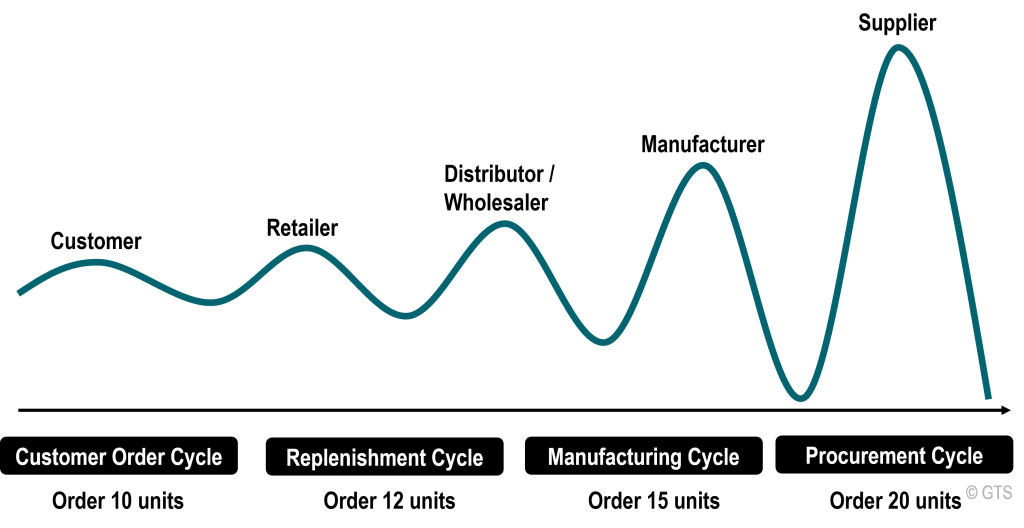

In [24]:
bullwhip = 'https://github.com/sc-matthew/Pandas_Project/raw/main/PIC_Bullwhip%20Visualisation.png'

get_pic_from_url(bullwhip)

---

## Summary

ในช่วงทศวรรษที่ผ่านมาการท่องเที่ยวของประเทศไทยได้เติบโตและส่งผลให้เศรษฐกิจของประเทศไทยเติบโตเป็นอย่างมาก โดยประเทศของเราติด 1 ใน 10 อันดับประเทศที่มีนักท่องเที่ยวต่างชาติเข้ามาเยอะที่สุดในโลก (World Tourism rankings by UN World Tourism Organisation)

ทั้งนี้ในช่วงหลังมานี้มีความกังวลในเรื่องของอัตราค่าครองชีพที่สูงขึ้น และราคาของสินค้าซึ่งสามารถสังเกตได้จากค่า CPI ผู้จัดทำจึงอยากทราบว่าการที่นักท่องเที่ยวชาวต่างชาติเดินทางเข้ามาในประเทศไทย ส่งผลกับการที่อัตราเงินเฟ้อของประเทศเพิ่มขึ้นหรือไม่ 
```โดยเราได้ตั้งสมมติฐานไว้ว่า การที่นักท่องเที่ยวชาวต่างชาติเดินทางเข้ามาในประเทศไทยทำให้อัตราเงินเฟ้อของเราเพิ่มมากขึ้น ```

* ภายใต้ช่วงเวลาที่มีการพิจารณาข้อมูล จะสังเกตได้ว่าประเทศไทยมีภาวะเงินเฟ้ออยู่ในเกณฑ์ปกติดีที่เฉลี่ยประมาณ 2%
* จากค่า Correlation ที่ทำการพิจารณาจากทั้ง 3 ตัวแปร ทำให้เราสามารถที่จะตั้งสมมติฐานได้ว่าเกิดภาวะที่เรียกว่า "Bullwhip Effect" ขึ้นภายในประเทศ ซึ่งเป็นปัญหาที่เกิดจากการผลิตสินค้าและบริการเกินความต้องการของผู้บริโภค ทำให้ราคาสินค้าและบริการไม่เพิ่มขึ้นตาม Aggregated Demand
    * ซึ่งจากภาวะ Bullwhip Effect นี้เป็นผลที่เกิดจากในด้านของโลจิสติกส์และห่วงโซ่อุปทาน (Logistics and Supply Chain) ซึ่งเราสามารถแก้ไขปัญหานี้ได้ด้วยการปรับปรุงนโยบายบางส่วนของทางผู้ประกอบการ ตั้งแต่ต้นน้ำ (ผู้จัดหาวัตถุดิบ) จนถึงปลายน้ำ (ร้านค้าที่ขายสินค้า)

## Suggestion
* จากค่า Correlation ระหว่าง Inflation of Thailand (%change) และ No. Arrival (%change) ที่ -0.95 ทำให้สามารถตั้งสมมติฐานได้ว่าเกิด Bullwhip Effect ภายในประเทศ ซึ่งเป็นปัญหาที่เกิดจากการผลิตสินค้าและบริการเกินความต้องการขอผู้บริโภค ทำให้ต้นทุนสูงขึ้นและกำไรน้อยลง ทางคณะผู้จัดทำขอแนะนำให้ทาง Retailer, Manufacturer and Supplier ดังตอไปนี้ ปฎิบัติดังต่อไปนี้เพื่อแก้ไขปัญหา

    1.การปรับปรุงการแบ่งปันข้อมูลระหว่างคู่ค้าในห่วงโซ่อุปทาน: 
    * สิ่งนี้เกี่ยวข้องกับการใช้ระบบและกระบวนการที่อนุญาตให้มีการแบ่งปันข้อมูลแบบ Real-Time ซึ่งการ Coordinate ระหว่างคู่ค้าในห่วงโซ่อุปทานและการแชร์ข้อมูลอุปสงค์สามารถลดความไม่แน่นอนที่ทำให้เกิดการขยายอุปสงค์ใน Bullwhip Effect ได้

    2.การใช้แนวปฏิบัติที่ขับเคลื่อนด้วยความต้องการ เช่น Just-In-Time (JIT): 
    * JIT เป็นกลยุทธ์การผลิตที่มุ่งเน้นเฉพาะการผลิตสิ่งที่จำเป็นเมื่อจำเป็น โดยอิงตามความต้องการที่แท้จริงของลูกค้า ซึ่งช่วยลดระดับสินค้าคงคลังและลดโอกาสของการผลิตเกินและสต็อกหมด

    3.การลด Lead Time ในห่วงโซ่อุปทาน: 
    * Lead Time หมายถึงเวลาที่ใช้ในการดำเนินการตามคำสั่งซื้อ ตั้งแต่ช่วงเวลาที่สั่งซื้อสินค้าจนกระทั่งสินค้าสามารถวางขายได้ ซึ่งถ้าลดเวลาส่วนนี้ได้จะลดเวลาสำหรับสต็อกของได้ 

    4.การกำหนดจุด Safety Stock เพื่อลดความไม่แน่นอนของอุปสงค์: 
    * สินค้าคงคลังที่จุด Safety Stock คือสินค้าคงคลังที่เก็บไว้เพื่อป้องกันสินค้าคงคลังในกรณีที่อุปสงค์พุ่งสูงขึ้นโดยไม่คาดคิด ซึ่งถ้าบริษัทต้องการลดผลกระทบจากความไม่แน่นอนของอุปสงค์ที่มีต่อการดำเนินงาน จำเป็นต้องสต็อกสำรองที่จุด Safety Stock และสำคัญที่สุดคือการเก็บในปริมาณที่เหมาะสม โดยต้องมีการคำนวณหา Safety Stock ไว้ด้วยเหตุผลดังกล่าว

    5.ใช้เทคโนโลยีช่วยบริหารในห่วงโซ่อุปทาน: 
    * การใช้เทคโนโลยีเข้ามาช่วยในห่วงโซ่อุปทานจะลด Human error และเพิ่มขีดจำกัดในการผลิตสินค้า ซึ่งทำให้การดำเนินการและวางแผนมีประสิทธิภาพมากขึ้น

---

## References & Sources:

* ข้อมูลนักท่องเที่ยวที่เดินทางเข้ามาในประเทศ ปี 2013-2019
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2013](https://www.mots.go.th/news/category/470)
    
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2014](https://www.mots.go.th/news/category/476)
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2015](https://www.mots.go.th/news/category/479)
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2016](https://www.mots.go.th/news/category/435)
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2017](https://www.mots.go.th/news/category/414)
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2018](https://www.mots.go.th/news/category/497)
    * [Ministry of Tourism and Sports -  International Tourist Arrivals to Thailand 2019](https://www.mots.go.th/news/category/521)

* อัตราตัวเลขเงินเฟ้อ - Scraping Data
    * [DataWorld : Thailand](https://www.worlddata.info/asia/thailand/inflation-rates.php)
    
    * [DataWorld : Vietnam](https://www.worlddata.info/asia/vietnam/inflation-rates.php)
